In [1]:
# predictive analytics

In [2]:
# scikit learn provide simple tools for data modelling and analysis

In [3]:
from sklearn import datasets

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# - IRIS

In [5]:
iris = datasets.load_iris()
iris_features = iris.data
iris_target = iris.target

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## import the estimator (model)

### K-Neighbor Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

### create an instance of the estimator

In [9]:
flower_classifier = KNeighborsClassifier(n_neighbors=3)

### use data to train the estimator

In [10]:
flower_classifier.fit(iris_features,iris_target)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# not evaluating using metrices

### predictions

In [12]:
new_flower1 = np.array([[5.1, 3.0, 1.1, 0.5]])
new_flower2 = np.array([[6.0, 2.9, 4.5, 1.1]])

0 -> setosa <br>
1 -> versicolor <br>
2 -> virginica

In [13]:
flower_classifier.predict(new_flower1)

array([0])

In [14]:
flower_classifier.predict(new_flower2)

array([1])

In [15]:
new_flower = np.array([[5.1, 3.0, 1.1, 0.5],[6.0, 2.9, 4.5, 1.1]])
predictions = flower_classifier.predict(new_flower)
predictions

array([0, 1])

# - Students Dataset ACL

In [49]:
student = pd.read_csv('student-por.csv')
student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc']+2*student['Walc'])/7

# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

In [50]:
student.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1.000000,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1.000000,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2.285714,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1.000000,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1.285714,Low


In [51]:
features = ['gender','famsize','age','studytime','famrel','goout','freetime','G3']
target = 'acl'

In [52]:
# scikit learn only understand numbers, so we use
# dummy features, or it's also called OneHot Encoding

In [53]:
# gender: Female -> 0, Male -> 1
student['gender'] = student['gender'].map({'F':0, 'M':1}).astype(int)

# # famsize: LE3 -> 0, GT3 -> 1
student['famsize'] = student['famsize'].map({'LE3':0, 'GT3':1}).astype(int)

# # acl: Low -> 0, High -> 1
student['acl'] = student['acl'].map({'Low':0, 'High':1}).astype(int)

In [55]:
X = student[features].values
y = student[target].values

In [56]:
student['acl'].value_counts(normalize=True)

0    0.744222
1    0.255778
Name: acl, dtype: float64

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
student_classifier_logreg = LogisticRegression(C=2)

In [59]:
student_classifier_logreg.fit(X, y)

LogisticRegression(C=2)

### Model evaluation

In [60]:
student['predictions_logreg'] = student_classifier_logreg.predict(X)

In [61]:
confusion_matrix = pd.crosstab(student['predictions_logreg'], student['acl'])
confusion_matrix

acl,0,1
predictions_logreg,,
0,452,105
1,31,61


### Accuracy of logistic regression

In [72]:
ac = (confusion_matrix.iat[0,0]+confusion_matrix.iat[1,1])/student.shape[0]
print('Accuracy: {}'.format(ac))

Accuracy: 0.7904468412942989


## lets try student data with more complex model

### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
student_classifier_rf = RandomForestClassifier()

In [75]:
student_classifier_rf.fit(X, y)
student['predictions_rf'] = student_classifier_rf.predict(X)

In [76]:
confusion_matrix = pd.crosstab(student['predictions_rf'], student['acl'])
confusion_matrix

acl,0,1
predictions_rf,,
0,482,3
1,1,163


In [77]:
ac = (confusion_matrix.iat[0,0]+confusion_matrix.iat[1,1])/student.shape[0]
print('Accuracy: {}'.format(ac))

Accuracy: 0.9938366718027735


> prediction for new data

In [81]:
# ['gender','famsize','age','studytime','famrel','goout','freetime','G3(grade)']
new_student = np.array([[0,1,18,2,1,5,5,18]])
prediction = student_classifier_rf.predict(new_student)
print('The model predicts that the student belongs to the:')
if prediction == 1:
    print('High Alcohol Consumption group')
else:
    print('Low Alcohol Consumption group')

The model predicts that the student belongs to the:
Low Alcohol Consumption group


**Even tho the prediction is very good in random forest, one should remember that model like Random Forest do overfitting.**

model evaluation require more work.

# - House Prices

In [86]:
housing = pd.read_csv('train.csv', index_col=0)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [87]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

### getting Neighborhoods with more than 30 observations

In [93]:
counts = housing['Neighborhood'].value_counts()
more_than_30 = list(counts[counts>30].index)
housing = housing.loc[housing['Neighborhood'].isin(more_than_30)]

In [95]:
features = ['CentralAir','LotArea','OverallQual','OverallCond',
                   '1stFlrSF','2ndFlrSF','BedroomAbvGr','Age']
target = 'SalePrice'

### transforming Neighborhoods and CentralAir to the one-hot encoding format

In [96]:
# Neighborhood
dummies_nbh = pd.get_dummies(housing['Neighborhood'],drop_first=True)
housing = pd.concat([housing, dummies_nbh], axis=1)

# CentralAir
housing['CentralAir'] = housing['CentralAir'].map({'N':0, 'Y':1}).astype(int)

In [97]:
features += list(dummies_nbh.columns)

In [99]:
X = housing[features].values
y = housing[target].values
n = housing.shape[0]

In [100]:
y_mean = np.mean(y)
y_mean

180167.63358778626

In [101]:
# Root Mean Square Error for model evaluation
RMSE_null_model = np.sqrt(np.sum((y - y_mean)**2)/n)
RMSE_null_model

78032.94485454109

### Regression model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
regressor = LinearRegression()

In [104]:
regressor.fit(X, y)

LinearRegression()

In [105]:
housing['predictions'] = regressor.predict(X)

In [109]:
y_pred = housing['predictions'].values

In [110]:
RMSE_regressor = np.sqrt(np.sum((y-y_pred)**2)/n)
RMSE_regressor

33729.218173366105

<AxesSubplot:xlabel='SalePrice', ylabel='predictions'>

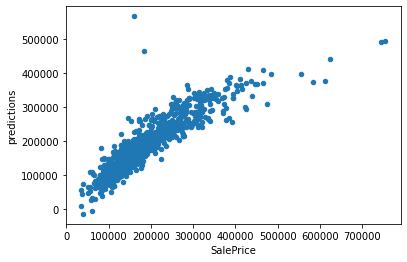

In [111]:
housing.plot.scatter(x = 'SalePrice', y ='predictions')

### New Predictions

In [113]:
new_house = np.array([[1,12000,6,6,1200,500,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]])
prediction = regressor.predict(new_house)
print('For a house with the following characteristics:\n')
for feature, feature_value in zip(features, new_house[0]):
    if feature_value > 0:
        print('{}: {}'.format(feature, feature_value))
print('\nThe predicted value for the house is: {:,}'.format(round(prediction[0])))

For a house with the following characteristics:

CentralAir: 1
LotArea: 12000
OverallQual: 6
OverallCond: 6
1stFlrSF: 1200
2ndFlrSF: 500
BedroomAbvGr: 3
Age: 5
Edwards: 1

The predicted value for the house is: 188,455


**NOTE: in this notebook the models are not properly evaluated**